# **Exploratory Data Analysis Pada Data Sales Customer Transactions Dataset**

**INFORMASI DATASET**

Dataset yang digunakan dalam analisis ini adalah "Sales Customer Transactions Dataset" yang tersedia di platform [Kaggle](https://www.kaggle.com/datasets/mohammedarfathr/customer-transactions-dataset?resource=download). Dataset ini menyediakan catatan transaksi pelanggan, termasuk informasi demografis seperti usia dan pendapatan tahunan, serta indikator perilaku seperti skor pengeluaran, frekuensi pembelian, dan jumlah transaksi. Meskipun dataset ini bersifat sintetis, tujuannya adalah untuk merepresentasikan pola-pola pembelian pelanggan yang beragam, yang menjadikannya sumber data yang relevan untuk eksplorasi perilaku konsumen dalam konteks ritel.

Analisis terhadap dataset ini bertujuan untuk memahami karakteristik pelanggan melalui eksplorasi data (Exploratory Data Analysis atau EDA). Proses ini melibatkan pembersihan data dari missing values, duplikat, dan outlier, serta visualisasi untuk mengidentifikasi distribusi variabel dan potensi hubungan antar fitur. Dengan memahami pola-pola yang tersembunyi dalam data transaksi ini, diharapkan dapat memberikan insight awal mengenai segmentasi pelanggan potensial atau tren perilaku konsumen yang dapat menjadi dasar untuk analisis atau pemodelan lebih lanjut.

# **Import Libarary**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Membaca Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio/dibimbingid/unclean_customer_data.csv')

df

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,8270,31.0,75851.592212,77.104268,17,129.724190
1,1860,48.0,44460.183764,61.349076,25,91.479265
2,6390,17.0,43677.755605,22.589956,9,130.573812
3,6191,34.0,48666.812544,82.069525,0,72.395846
4,6734,44.0,46080.334029,65.076915,3,156.399077
...,...,...,...,...,...,...
10195,9671,39.0,39870.421785,25.272516,1,-11.548475
10196,4845,25.0,47530.350762,34.046823,18,172.787265
10197,9120,30.0,44544.515138,83.278677,11,20.551706
10198,5944,33.0,54071.917805,78.138947,24,4.974859


#**Mengecek Struktur Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         10200 non-null  int64  
 1   Age                 9943 non-null   float64
 2   Annual_Income       10200 non-null  float64
 3   Spending_Score      10200 non-null  float64
 4   Purchase_Frequency  10200 non-null  int64  
 5   Transaction_Amount  9944 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 478.3 KB


In [ ]:
df.describe()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
count,10200.000000,9943.000000,10200.000000,10200.000000,10200.000000,9944.000000
mean,5466.655392,34.458212,50124.610200,50.587613,14.507255,100.190612
std,2591.699853,9.998262,14915.806974,28.628536,8.662804,49.846288
min,1001.000000,0.000000,-17177.834332,1.009234,0.000000,-86.593231
25%,3211.750000,28.000000,40002.275881,26.110644,7.000000,66.144312
50%,5485.000000,34.000000,50091.128413,50.287120,15.000000,100.177920
75%,7708.250000,41.000000,60290.094248,75.637159,22.000000,133.994751
max,9998.000000,69.000000,112218.425755,99.990069,29.000000,273.518342


**Observasi:**
1. Beberapa nilai ekstrem ditemukan yang tidak masuk akal, seperti:
  * `Age` minimum = 0 tahun → kemungkinan kesalahan input
  * `Annual_Income` minimum = -17.177.834 → nilai negatif tidak logis
  * `Transaction_Amount` minimum = -86.59 → transaksi seharusnya tidak negatif

2. Mean mendekati Median (50%) di kolom berikut:
  * `Age`: mean = 34.45, median = 34
  * `Spending_Score`: mean = 50.58, median = 50.29
  * `Purchase_Frequency`: mean = 14.50, median = 15
  → menunjukkan bahwa distribusi relatif normal/simetris

3. Annual_Income memiliki distribusi yang miring (skewed):
  * Mean jauh lebih rendah dari median → adanya outlier (nilai negatif dan sangat tinggi)

4. Transaction_Amount memiliki persebaran yang cukup wajar, tetapi perlu penanganan missing values dan nilai negatif



# Mengecek dan Mengatasi Duplikat Data

## Mengecek Data Duplicate

In [ ]:
# Memeriksa duplicate
check_duplicate = df.duplicated().sum()
print(f"Jumlah data yang duplikat = {check_duplicate}")

Jumlah data yang duplikat = 200


## Handling Duplicate

In [ ]:
# Menghapus baris duplikat
df = df.drop_duplicates()

In [ ]:
# Memeriksa duplicate setelah dihapus
handle_duplicate = df.duplicated().sum()
print(f"Jumlah data yang duplikat = {handle_duplicate}")

Jumlah data yang duplikat = 0


# Mengecek dan Mengatasi Missing Values

## Mengecek Missing Values

In [ ]:
# Memeriksa nilai yang hilang
df.isna().sum()

,0
Customer_ID,0
Age,250
Annual_Income,0
Spending_Score,0
Purchase_Frequency,0
Transaction_Amount,250


**Observasi:**

Dari informasi yang kita dapatkan pada data terdapat beberapa data yang hilang pada kolom `Age`, dan `Transaction_Amount`

## Handling Missing Values

In [ ]:
#Mengatasi Missing Values Mengisinya dengan Nilai Median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Transaction_Amount'].fillna(df['Transaction_Amount'].median(), inplace=True)

<ipython-input-11-91269735da22>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-11-91269735da22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-11-91269735da22>:3: FutureWarning: A value is trying to be set on 

In [ ]:
# Memeriksa data setelah dilakuakan Handling Missing Values
df.isnull().sum()

,0
Customer_ID,0
Age,0
Annual_Income,0
Spending_Score,0
Purchase_Frequency,0
Transaction_Amount,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         10000 non-null  int64  
 1   Age                 10000 non-null  float64
 2   Annual_Income       10000 non-null  float64
 3   Spending_Score      10000 non-null  float64
 4   Purchase_Frequency  10000 non-null  int64  
 5   Transaction_Amount  10000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 546.9 KB


## Pembersihan Data Tidak Valid

In [ ]:
# Hapus baris dengan 'Age' <= 0 karena usia tidak bisa 0 atau negatif
df = df[df['Age'] > 0]  # Filter data untuk hanya menyertakan Age > 0

In [ ]:
# Hapus baris dengan 'Annual_Income' < 0 karena pendapatan tidak bisa negatif
df = df[df['Annual_Income'] > 0]  # Filter data untuk hanya menyertakan Annual_Income > 0

In [ ]:
# Hapus baris dengan 'Transaction_Amount' < 0 karena transaksi tidak bisa bernilai negatif
df = df[df['Transaction_Amount'] >= 0]  # Filter data untuk hanya menyertakan Transaction_Amount >= 0

In [ ]:
df.describe()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
count,9776.000000,9776.000000,9776.000000,9776.000000,9776.000000,9776.000000
mean,5459.619579,34.421645,50149.796995,50.639297,14.517390,102.932041
std,2590.692382,9.838512,14867.263466,28.619598,8.665025,46.242153
min,1001.000000,1.000000,156.055900,1.009234,0.000000,0.123557
25%,3206.500000,28.000000,40031.512362,26.110644,7.000000,69.805154
50%,5475.000000,34.000000,50114.943870,50.382265,15.000000,100.156824
75%,7691.750000,41.000000,60323.088037,75.717149,22.000000,133.882674
max,9998.000000,68.000000,112218.425755,99.990069,29.000000,273.518342


**Observasi:**
* Secara keseluruhan, nilai minimum dan maksimum untuk setiap kolom sudah masuk akal dan tidak ada nilai ekstrem yang tidak valid setelah pembersihan data.
* Mean ~ Median (50%) di kolom `Age`, `Spending_Score`, dan `Purchase_Frequency`, menunjukkan distribusi yang mendekati normal.
* Kolom `Customer_ID` adalah kolom unik dengan nilai-nilai yang tidak dapat disimpulkan distribusinya, karena hanya berfungsi sebagai identifikasi pelanggan.
* Kolom `Annual_Income` dan `Transaction_Amount` memiliki distribusi yang lebar, dengan nilai yang cukup bervariasi, serta pada kolom `Age`, nilai minimumnya adalah 1 tahun, perlu diperiksa lebih lanjut untuk melihat adanya outlier atau ketidakseimbangan.

# **Mengecek dan Mengatasi Outlier**

## Mengecek Outlier

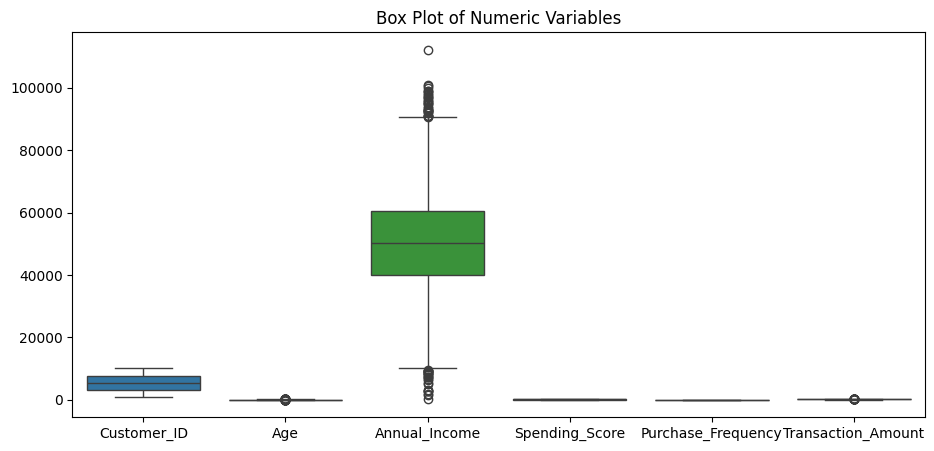

In [ ]:
# Memilih hanya kolom numerik dari dataframe
numeric_df = df.select_dtypes(include=[np.number])

# Membuat boxplot untuk mendeteksi outlier potensial secara visual
plt.figure(figsize=(11, 5))
sns.boxplot(data=numeric_df)
plt.title('Box Plot of Numeric Variables')
plt.show()

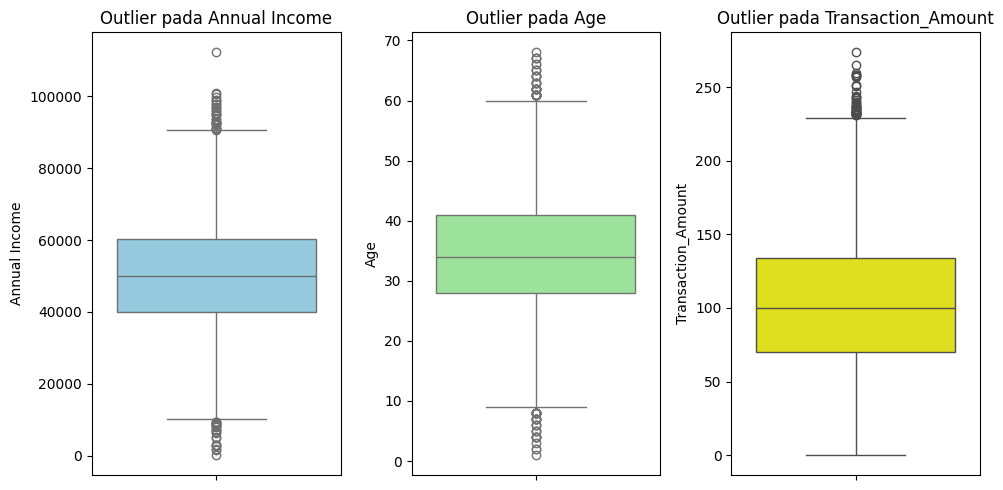

In [ ]:
# Buat figure dengan 2 boxplot berdampingan
plt.figure(figsize=(10, 5))

# Boxplot untuk Annual_Income
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Annual_Income'], color='skyblue')
plt.title('Outlier pada Annual Income')
plt.ylabel('Annual Income')

# Boxplot untuk Age
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Age'], color='lightgreen')
plt.title('Outlier pada Age')
plt.ylabel('Age')

# Boxplot untuk Transaction_Amount
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Transaction_Amount'], color='yellow')
plt.title('Outlier pada Transaction_Amount')
plt.ylabel('Transaction_Amount')

# Tampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
# Menghitung Q1 (25%) dan Q3 (75%) untuk Annual_Income
Q1_Annual_Income = df['Annual_Income'].quantile(0.25)
Q3_Annual_Income = df['Annual_Income'].quantile(0.75)

# Menghitung IQR untuk Annual_Income
IQR_Annual_Income = Q3_Annual_Income - Q1_Annual_Income

# Menentukan batas bawah dan batas atas untuk Annual_Income
lower_bound_Annual_Income = Q1_Annual_Income - 1.5 * IQR_Annual_Income
upper_bound_Annual_Income = Q3_Annual_Income + 1.5 * IQR_Annual_Income

# Menampilkan batas bawah dan batas atas untuk Annual_Income
print(f"Batas bawah: {lower_bound_Annual_Income}")
print(f"Batas atas: {upper_bound_Annual_Income}")

Batas bawah: 9594.148849076162
Batas atas: 90760.45155028024


In [ ]:
# Mendeteksi outlier pada kolom 'Annual_Income'
outliers_Annual_Income = df[(df['Annual_Income'] < lower_bound_Annual_Income) | (df['Annual_Income'] > upper_bound_Annual_Income)]

# Menampilkan jumlah dan data outlier untuk Annual_Income
print(f"Jumlah outlier pada kolom Annual_Income: {len(outliers_Annual_Income)}")
outliers_Annual_Income

Jumlah outlier pada kolom Annual_Income: 57


,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
144,6575,48.0,100577.312216,34.810744,8,70.127100
158,4581,35.0,2690.149169,62.351423,23,185.298170
249,2218,33.0,2888.396600,6.711545,27,143.500135
761,1232,37.0,97116.639305,56.496698,16,45.882815
922,6109,40.0,92021.155673,10.793425,20,174.144791
975,9533,48.0,95895.594066,95.406750,25,189.333126
1103,5124,41.0,99008.302644,47.412568,7,103.576954
1268,8657,30.0,95454.772198,2.509788,5,145.931656
1476,1552,49.0,93617.237516,22.638134,28,165.255693
1742,1145,26.0,112218.425755,18.165990,9,100.156824


In [ ]:
# Menghitung Q1 (25%) dan Q3 (75%) untuk Age
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)

# Menghitung IQR untuk Age
IQR_age = Q3_age - Q1_age

# Menentukan batas bawah dan batas atas untuk Age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Menampilkan batas bawah dan batas atas untuk Age
print(f"Batas bawah untuk Age: {lower_bound_age}")
print(f"Batas atas untuk Age: {upper_bound_age}")

Batas bawah untuk Age: 8.5
Batas atas untuk Age: 60.5


In [ ]:
# Mendeteksi outlier pada kolom 'Age'
outliers_age = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]

# Menampilkan jumlah dan data outlier untuk Age
print(f"Jumlah outlier pada kolom Age: {len(outliers_age)}")
outliers_age

Jumlah outlier pada kolom Age: 76


,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
78,1064,8.0,29180.075894,34.021814,1,183.191037
101,9110,4.0,47437.460835,17.870226,23,77.842371
102,4840,7.0,76098.193320,87.362541,6,89.652993
226,5499,63.0,75047.802479,55.271740,2,59.110471
384,2679,4.0,62470.570065,1.246375,17,127.584834
...,...,...,...,...,...,...
9249,9860,8.0,64532.193408,29.224134,10,100.156824
9391,7050,4.0,50012.356342,87.106390,17,110.314887
9554,1352,5.0,91073.792946,64.562939,17,100.156824
9840,7486,2.0,45300.946896,33.829292,5,92.147324


In [ ]:
# Menghitung Q1 (25%) dan Q3 (75%) untuk Transaction_Amount
Q1_Transaction_Amount = df['Transaction_Amount'].quantile(0.25)
Q3_Transaction_Amount = df['Transaction_Amount'].quantile(0.75)

# Menghitung IQR untuk Transaction_Amount
IQR_Transaction_Amount = Q3_Transaction_Amount - Q1_Transaction_Amount

# Menentukan batas bawah dan batas atas untuk Transaction_Amount
lower_bound_Transaction_Amount = Q1_Transaction_Amount - 1.5 * IQR_Transaction_Amount
upper_bound_Transaction_Amount = Q3_Transaction_Amount + 1.5 * IQR_Transaction_Amount

# Menampilkan batas bawah dan batas atas untuk Transaction_Amount
print(f"Batas bawah untuk Transaction_Amount: {lower_bound_Transaction_Amount}")
print(f"Batas atas untuk Transaction_Amount: {upper_bound_Transaction_Amount}")

Batas bawah untuk Transaction_Amount: -26.311126421369565
Batas atas untuk Transaction_Amount: 229.9989546106721


In [ ]:
# Mendeteksi outlier pada kolom 'Transaction_Amount'
outliers_Transaction_Amount = df[(df['Transaction_Amount'] < lower_bound_Transaction_Amount) | (df['Transaction_Amount'] > upper_bound_Transaction_Amount)]

# Menampilkan jumlah dan data outlier untuk Transaction_Amount
print(f"Jumlah outlier pada kolom Transaction_Amount: {len(outliers_Transaction_Amount)}")
outliers_Transaction_Amount

Jumlah outlier pada kolom Transaction_Amount: 37


,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
34,4556,39.0,50309.269778,74.573204,7,250.887697
678,8941,46.0,53712.084087,58.130063,13,233.011292
1008,1832,29.0,52426.461804,45.847166,14,244.236042
2054,5330,28.0,56566.263213,8.388457,29,236.878398
2146,2169,24.0,58009.403323,61.379252,12,273.518342
2556,4744,44.0,49552.222291,51.408073,24,237.291797
2630,2442,24.0,43669.634089,25.423095,5,231.717871
2958,4253,20.0,56401.738773,37.653999,26,233.675488
3165,1278,41.0,45097.724856,89.902385,5,242.776091
3303,2424,31.0,78728.367570,71.030660,9,241.074513


In [ ]:
#Menghapus baris yang memiliki Annual_Income di luar batas normal
df = df[(df['Annual_Income'] >= lower_bound_Annual_Income) & (df['Annual_Income'] <= upper_bound_Annual_Income)]

# Menghapus baris yang memiliki nilai Age di luar batas normal
df = df[(df['Age'] >= lower_bound_age) & (df['Age'] <= upper_bound_age)]

# Menghapus baris yang memiliki nilai Transaction_Amount di luar batas normal
df = df[(df['Transaction_Amount'] >= lower_bound_Transaction_Amount) & (df['Transaction_Amount'] <= upper_bound_Transaction_Amount)]

In [ ]:
# Cek struktur dan info dataset setelah pembersihan
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9608 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         9608 non-null   int64  
 1   Age                 9608 non-null   float64
 2   Annual_Income       9608 non-null   float64
 3   Spending_Score      9608 non-null   float64
 4   Purchase_Frequency  9608 non-null   int64  
 5   Transaction_Amount  9608 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 525.4 KB


In [ ]:
# Cek statistik deskriptif dataset setelah pembersihan
df.describe()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
count,9608.000000,9608.000000,9608.000000,9608.000000,9608.000000,9608.000000
mean,5466.249792,34.411012,50094.414834,50.681034,14.517694,102.386168
std,2589.183524,9.560738,14502.997254,28.625123,8.666778,45.536661
min,1001.000000,9.000000,10043.359735,1.009234,0.000000,0.123557
25%,3217.000000,28.000000,40103.952357,26.139967,7.000000,69.662754
50%,5482.000000,34.000000,50072.675414,50.402076,15.000000,100.156824
75%,7701.000000,41.000000,60215.610788,75.816713,22.000000,133.491713
max,9998.000000,60.000000,90687.289200,99.990069,29.000000,229.320915


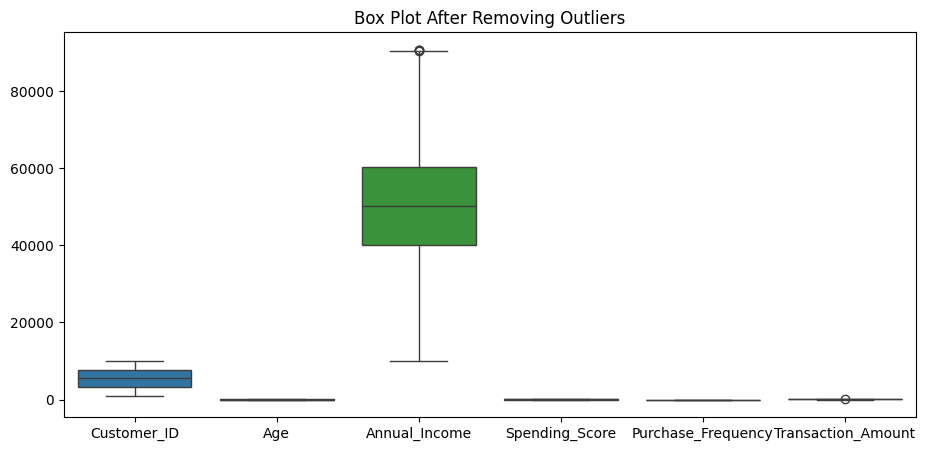

In [ ]:
# Boxplot setelah pembersihan outlier
plt.figure(figsize=(11, 5))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Box Plot After Removing Outliers')
plt.show()

# **Proses EDA Tambahan**

## Heatmap Corelation

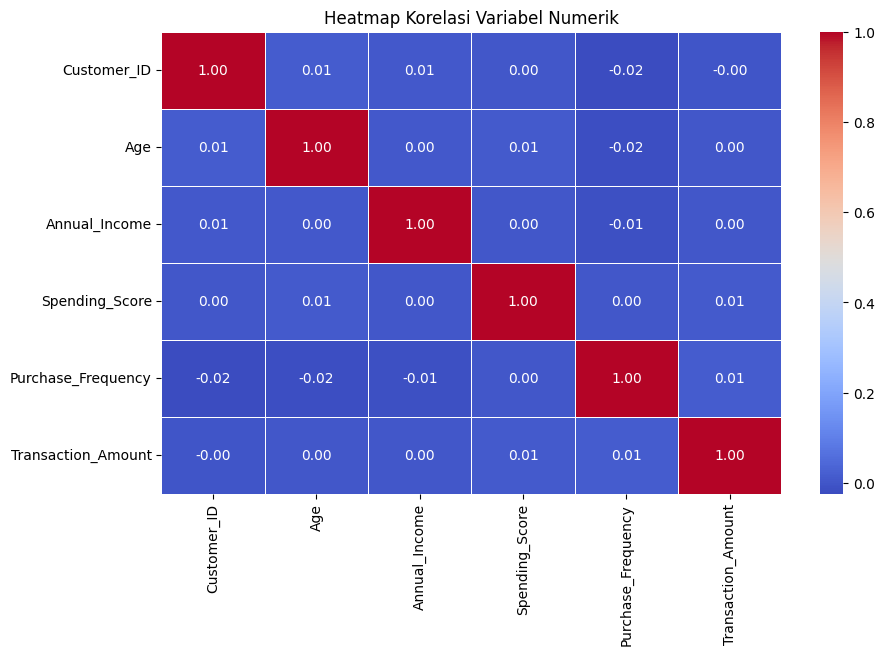

In [ ]:
# Heatmap untuk melihat korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

## Pair Plot

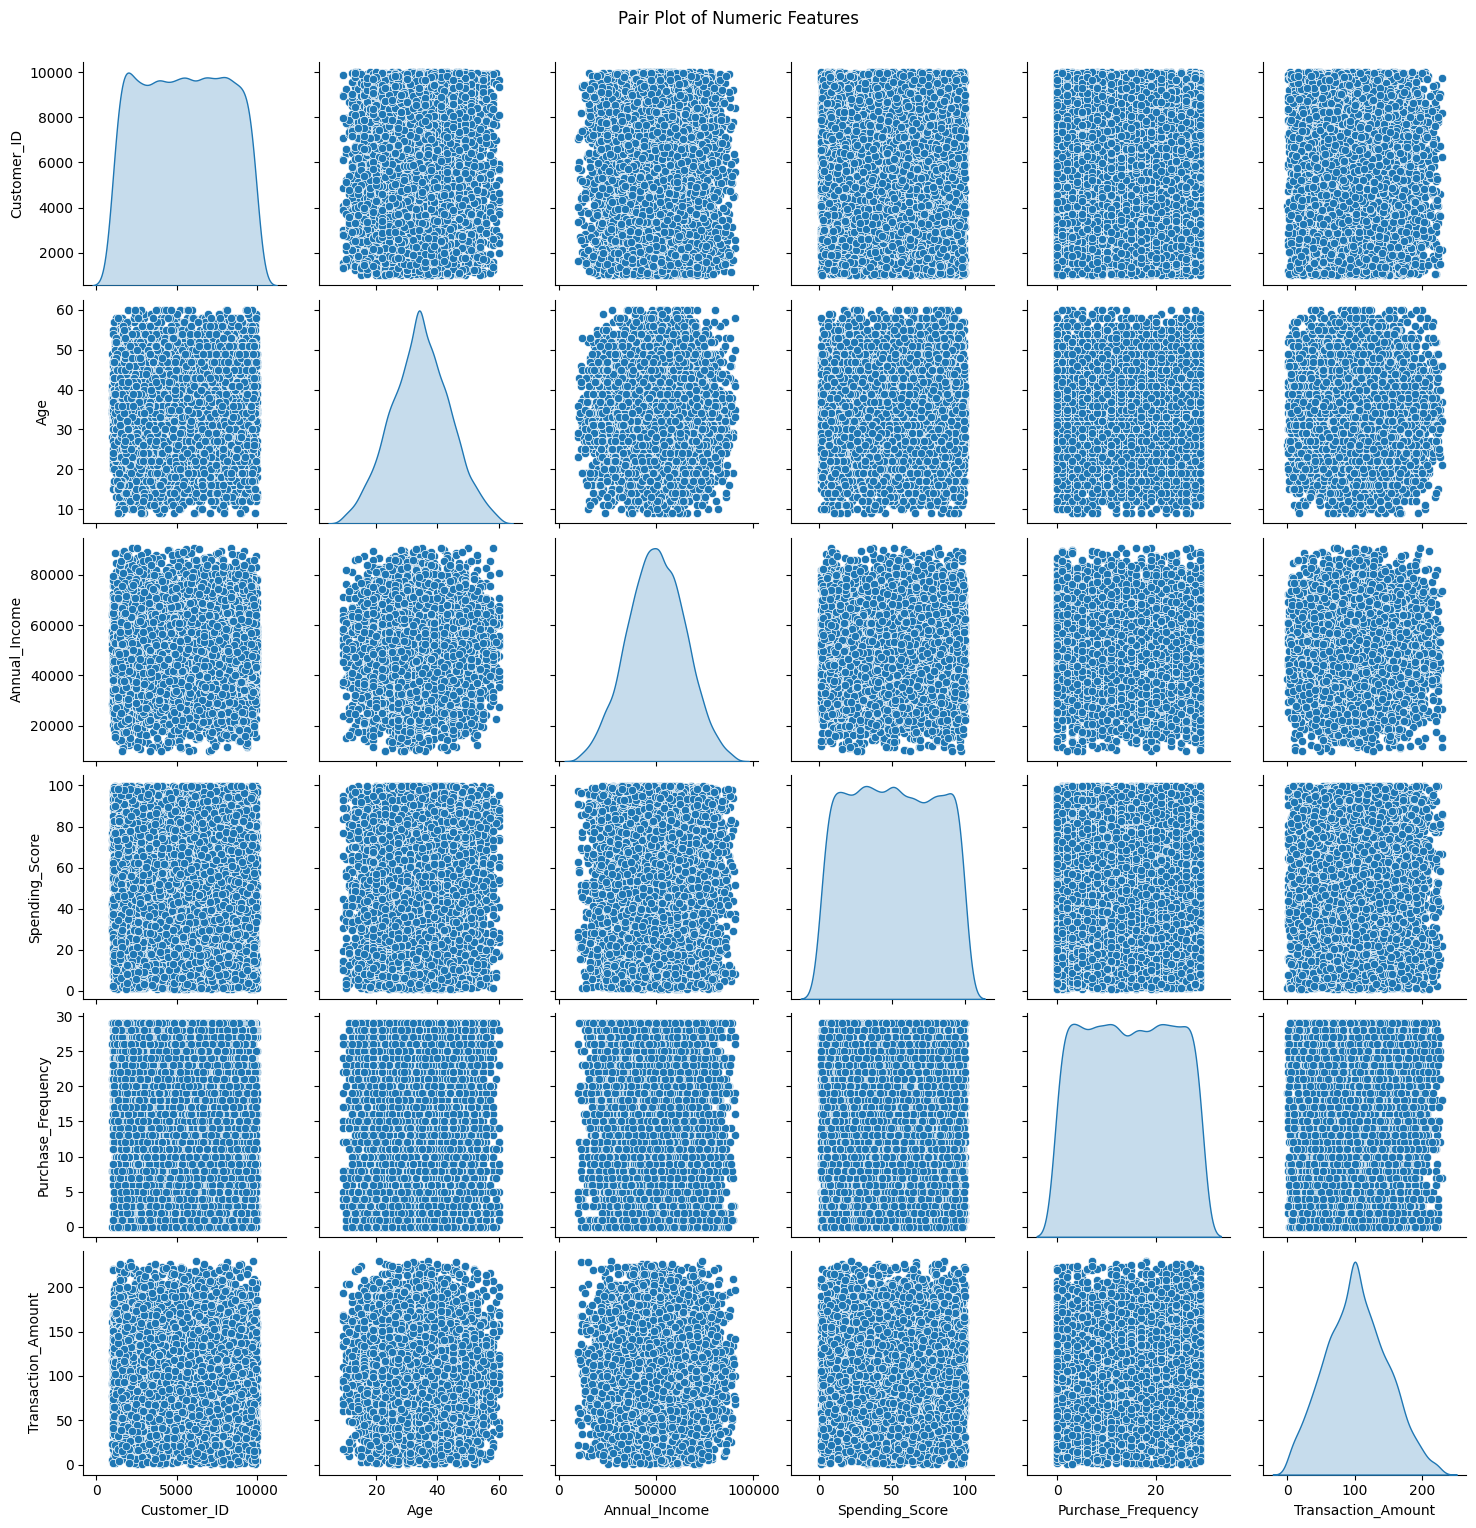

In [ ]:
# Pair plot untuk melihat relasi dan distribusi antar fitur numerik
sns.pairplot(df.select_dtypes(include='number'), diag_kind='kde')
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

## Distribution Plot

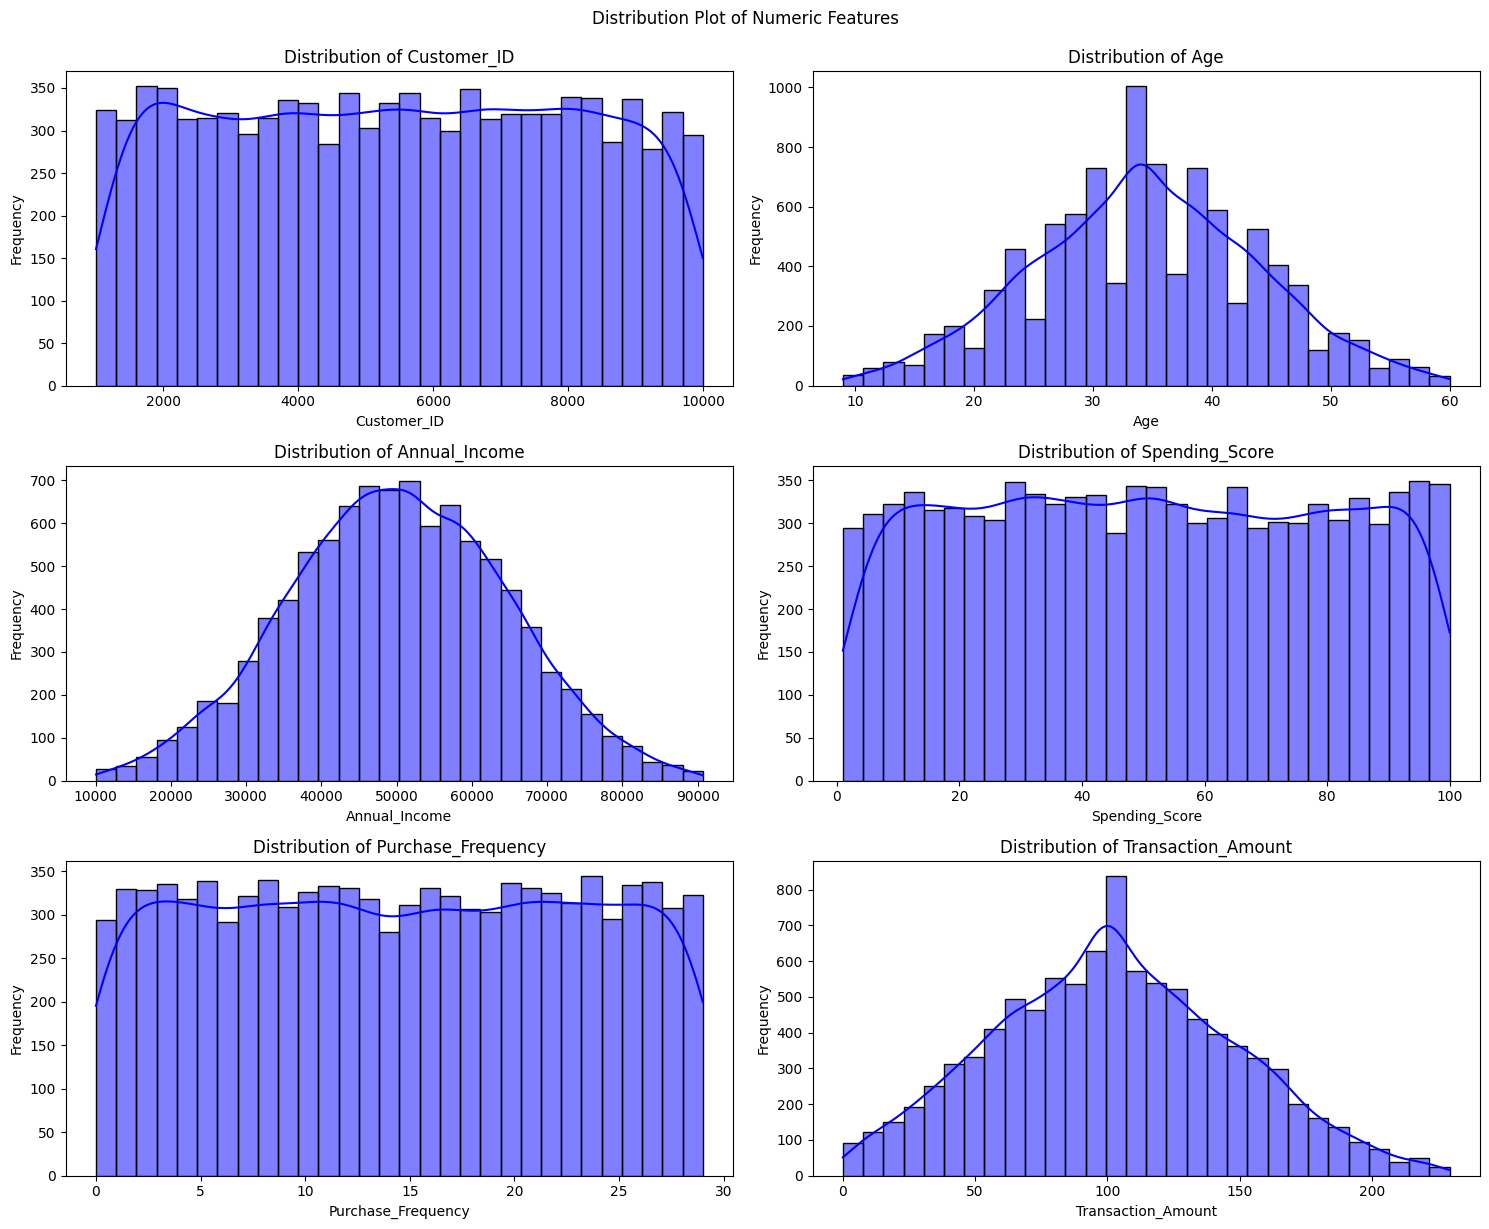

In [ ]:
# Distribution plot untuk setiap kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle("Distribution Plot of Numeric Features", y=1.02)
plt.show()

# Conclusions and Suggestions

**Kesimpulan**
1. Data berhasil dibersihkan dari duplikat dan nilai tidak valid.
2. Missing values berhasil diatasi dengan pengisian median.
3. Outlier diidentifikasi dan ditangani untuk meminimalisir pengaruh nilai ekstrem.
4. Distribusi variabel numerik setelah pembersihan umumnya terlihat masuk akal.
5. Tidak ditemukan korelasi linear yang kuat antar variabel numerik.
6. Tujuan EDA untuk memahami karakteristik dasar dataset telah tercapai.

**Saran**
1. Pertimbangkan feature engineering jika ada informasi waktu transaksi yang lebih detail.
2. Eksplorasi segmentasi pelanggan menggunakan metode clustering.
3. Analisis lebih lanjut dapat difokuskan pada pertanyaan bisnis spesifik.
4. Jika tujuan berikutnya adalah prediksi, lanjutkan ke tahap pemodelan machine learning.